# 1) Data Pre-processing

In [136]:
import numpy as np
import pandas as pd

In [137]:
df_targets = pd.read_csv("targets.csv")

In [138]:
df_targets.shape      #there are 1734 patients

(1734, 3)

In [139]:
df_targets.columns

Index(['patient_id', 'biomarker_id', 'target_label'], dtype='object')

In [140]:
df_targets.head()

,patient_id,biomarker_id,target_label
0,1002df1d3,89c43bb4,0
1,1010441f,3ae31327,0
2,101eb6af1,1d8f7bab9,0
3,10204394e,129ee8c6c,0
4,1021d329b,1b44145bd,0


In [141]:
df_targets.target_label.value_counts()

0    1353
1     381
Name: target_label, dtype: int64

Here, we can see that there is imbalance in the data. This makes the model have a bias towards the class with majority observations.

In [142]:
len(df_targets.biomarker_id.unique())

1734

In [143]:
df_targets.describe()

,target_label
count,1734.000000
mean,0.219723
std,0.414179
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [144]:
df_biomarkers = pd.read_csv("biomarkers.csv")

In [145]:
df_biomarkers.shape

(1960, 15158)

There are 1734 unique patients and their respective biomarkers. The extra biomarkers_ids should be removed.

In [146]:
combined = pd.merge(df_targets, df_biomarkers, on='biomarker_id')
combined

,patient_id,biomarker_id,target_label,BM00000,BM00001,BM00002,BM00003,BM00004,BM00005,BM00006,...,BM15147,BM15148,BM15149,BM15150,BM15151,BM15152,BM15153,BM15154,BM15155,BM15156
0,1002df1d3,89c43bb4,0,1,1,1,1,0,0,0,...,1,0,0,1,1,0,1,1.0,1,1
1,1010441f,3ae31327,0,0,1,1,0,0,0,0,...,1,0,0,0,1,0,1,1.0,1,1
2,101eb6af1,1d8f7bab9,0,1,1,1,1,0,0,0,...,1,0,1,0,0,0,1,NaN,1,1
3,10204394e,129ee8c6c,0,1,1,1,1,0,0,0,...,0,0,1,0,0,1,1,1.0,1,1
4,1021d329b,1b44145bd,0,1,1,1,1,0,0,0,...,1,0,0,0,0,1,1,1.0,1,1
5,102fed7f0,b287ea6a,0,1,1,1,0,1,0,0,...,1,0,0,0,0,0,1,NaN,1,1
6,103d0f2ea,7fc557ee,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,NaN,1,1
7,1046d9744,1862b02c5,0,1,1,0,0,1,0,0,...,1,0,1,0,0,0,1,1.0,1,1
8,1057b66cd,1f6ef1258,0,1,1,1,0,0,0,1,...,1,0,0,0,0,1,1,1.0,1,1
9,10648559b,24d8c39f8,0,0,1,0,1,1,0,0,...,1,0,1,1,1,0,1,1.0,1,1


In [147]:
combined.shape

(1734, 15160)

The datasets were merged by an inner-join.

In [148]:
import json
from pandas.io.json import json_normalize
with open('patient_profiles.json') as json_data:
    data = json.load(json_data)
df = pd.DataFrame(data)               #reading the json file as a dataframe

In [149]:
df

,cohort_id,institution,patient_profiles
0,14562556998,Saint Penelope Medical Center,"[{'patient_id': '102bb8fae', 'demographics': {..."
1,14562556998,"BioLab, Inc.","[{'patient_id': '100688fb9', 'demographics': {..."
2,14562556998,University Hospital System,"[{'patient_id': '1002df1d3', 'demographics': {..."
3,14562556998,Goodfellow Research Institute,"[{'patient_id': '104fc5e3c', 'demographics': {..."
4,14562556998,Montague Hospital,"[{'patient_id': '1010441f', 'demographics': {'..."
5,14562556998,Johnson & Bloom Hospitals,"[{'patient_id': '103278b88', 'demographics': {..."
6,14562556998,Medical Information Exchange,"[{'patient_id': '1002cb1e8', 'demographics': {..."


In [150]:
institution_list = df.institution.tolist()
print(institution_list)                     #there are only 7 institutions

['Saint Penelope Medical Center', 'BioLab, Inc.', 'University Hospital System', 'Goodfellow Research Institute', 'Montague Hospital', 'Johnson & Bloom Hospitals', 'Medical Information Exchange']


In [151]:
df_pp = pd.DataFrame()
for i in range(len(institution_list)):
    print("-------------")
    print(i,institution_list[i])
    temp_series = pd.Series(df.patient_profiles[i])
    l_temp_series = len(temp_series)
    print(l_temp_series)
    temp_df = pd.DataFrame({"institution":[str(institution_list[i])]*l_temp_series ,
                    "patient_profiles":temp_series})
    df_pp = df_pp.append(temp_df, ignore_index = True)

-------------
0 Saint Penelope Medical Center
257
-------------
1 BioLab, Inc.
793
-------------
2 University Hospital System
335
-------------
3 Goodfellow Research Institute
132
-------------
4 Montague Hospital
378
-------------
5 Johnson & Bloom Hospitals
62
-------------
6 Medical Information Exchange
394


In [152]:
df_pp.head()

,institution,patient_profiles
0,Saint Penelope Medical Center,"{'patient_id': '102bb8fae', 'demographics': {'..."
1,Saint Penelope Medical Center,"{'patient_id': '10e32947f', 'demographics': {'..."
2,Saint Penelope Medical Center,"{'patient_id': '11156e14a', 'demographics': {'..."
3,Saint Penelope Medical Center,"{'patient_id': '113d8066d', 'demographics': {'..."
4,Saint Penelope Medical Center,"{'patient_id': '113ec3f1', 'demographics': {'g..."


In [153]:
df_pp.shape

(2351, 2)

I have not considered the cohort_id column as it is same for every patient.

There are total 2351 patients in the 'patient_profiles.json' file but we want only 1734 out of them.

In [154]:
df_pp_expanded = json_normalize(df_pp.patient_profiles, sep="-")
df_pp_expanded

,demographics-age,demographics-gender,demographics-race,patient_id,status-alcohol_usage,status-bmi_level,status-cohort_qualifier,status-comorbidity_index,status-days_since_diagnosis,status-disease_sub_type,status-exercise_frequency,status-months_since_diagnosis,status-smoking_status
0,68.0,Female,NaN,102bb8fae,NaN,NaN,True,0.0,NaN,A,NaN,1.0,never
1,66.0,Female,White,10e32947f,NaN,NaN,True,NaN,NaN,A,NaN,0.0,former
2,61.0,Male,White,11156e14a,NaN,NaN,True,1.0,NaN,A,NaN,16.0,never
3,62.0,Male,NaN,113d8066d,NaN,NaN,True,NaN,NaN,B,NaN,0.0,current
4,59.0,Male,NaN,113ec3f1,NaN,NaN,True,NaN,NaN,A,NaN,9.0,former
5,68.0,Male,NaN,114a37875,NaN,NaN,True,NaN,NaN,B,NaN,0.0,never
6,68.0,Female,NaN,1159615a3,NaN,NaN,True,NaN,NaN,A,NaN,0.0,never
7,47.0,Male,White,11b1d32a1,NaN,NaN,True,NaN,NaN,A,NaN,0.0,never
8,65.0,Female,Black or African American,11c6138f1,NaN,NaN,True,2.0,NaN,A,NaN,0.0,current
9,68.0,Male,White,11c7927cb,NaN,NaN,True,NaN,NaN,A,NaN,33.0,current


In [155]:
df_pp = pd.concat([df_pp,df_pp_expanded], axis=1)
df_pp = df_pp.drop(["patient_profiles"],axis=1)
df_pp

,institution,demographics-age,demographics-gender,demographics-race,patient_id,status-alcohol_usage,status-bmi_level,status-cohort_qualifier,status-comorbidity_index,status-days_since_diagnosis,status-disease_sub_type,status-exercise_frequency,status-months_since_diagnosis,status-smoking_status
0,Saint Penelope Medical Center,68.0,Female,NaN,102bb8fae,NaN,NaN,True,0.0,NaN,A,NaN,1.0,never
1,Saint Penelope Medical Center,66.0,Female,White,10e32947f,NaN,NaN,True,NaN,NaN,A,NaN,0.0,former
2,Saint Penelope Medical Center,61.0,Male,White,11156e14a,NaN,NaN,True,1.0,NaN,A,NaN,16.0,never
3,Saint Penelope Medical Center,62.0,Male,NaN,113d8066d,NaN,NaN,True,NaN,NaN,B,NaN,0.0,current
4,Saint Penelope Medical Center,59.0,Male,NaN,113ec3f1,NaN,NaN,True,NaN,NaN,A,NaN,9.0,former
5,Saint Penelope Medical Center,68.0,Male,NaN,114a37875,NaN,NaN,True,NaN,NaN,B,NaN,0.0,never
6,Saint Penelope Medical Center,68.0,Female,NaN,1159615a3,NaN,NaN,True,NaN,NaN,A,NaN,0.0,never
7,Saint Penelope Medical Center,47.0,Male,White,11b1d32a1,NaN,NaN,True,NaN,NaN,A,NaN,0.0,never
8,Saint Penelope Medical Center,65.0,Female,Black or African American,11c6138f1,NaN,NaN,True,2.0,NaN,A,NaN,0.0,current
9,Saint Penelope Medical Center,68.0,Male,White,11c7927cb,NaN,NaN,True,NaN,NaN,A,NaN,33.0,current


In [156]:
combined_final = pd.merge(combined, df_pp, on='patient_id')
combined_final                                               #all the three files are combined

,patient_id,biomarker_id,target_label,BM00000,BM00001,BM00002,BM00003,BM00004,BM00005,BM00006,...,demographics-race,status-alcohol_usage,status-bmi_level,status-cohort_qualifier,status-comorbidity_index,status-days_since_diagnosis,status-disease_sub_type,status-exercise_frequency,status-months_since_diagnosis,status-smoking_status
0,1002df1d3,89c43bb4,0,1,1,1,1,0,0,0,...,Asian,NaN,NaN,True,NaN,NaN,A,NaN,20.0,former
1,1010441f,3ae31327,0,0,1,1,0,0,0,0,...,BLACK OR AFRICAN AMERICAN,LOW,normal,True,NaN,NaN,A,0.0,0.0,NEVER
2,101eb6af1,1d8f7bab9,0,1,1,1,1,0,0,0,...,NaN,NaN,NaN,True,NaN,NaN,B,NaN,0.0,never
3,10204394e,129ee8c6c,0,1,1,1,1,0,0,0,...,White,NaN,NaN,True,NaN,NaN,A,NaN,9.0,never
4,1021d329b,1b44145bd,0,1,1,1,1,0,0,0,...,Asian,NaN,NaN,True,NaN,NaN,A,NaN,10.0,former
5,102fed7f0,b287ea6a,0,1,1,1,0,1,0,0,...,NaN,NaN,NaN,True,NaN,NaN,B,NaN,0.0,never
6,103d0f2ea,7fc557ee,0,1,1,0,0,0,0,0,...,Black or African American,NaN,NaN,True,NaN,NaN,A,NaN,0.0,current
7,1046d9744,1862b02c5,0,1,1,0,0,1,0,0,...,White,NaN,NaN,True,NaN,NaN,C,NaN,17.0,never
8,1057b66cd,1f6ef1258,0,1,1,1,0,0,0,1,...,Black or African American,NaN,NaN,True,NaN,NaN,A,NaN,5.0,never
9,10648559b,24d8c39f8,0,0,1,0,1,1,0,0,...,NaN,NaN,NaN,True,NaN,0.0,A,NaN,NaN,NaN


In [157]:
combined_final.shape

(1734, 15173)

Here, we can see that there are more features than observations which means that the system is underdetermined and may have infinite solutions. This most likely causes over-fitting because of too much flexibility.

The problem of imbalanced data can be corrected by using Ridge regression which uses L2 regularization. It shrinks the less important feature coefficients to 0 thus, removing some features. This works for feature selection which is beneficial for a dataset with huge number of features.

# 2) Missing data

In [158]:
missing = combined_final.append(((combined_final.apply(lambda x: x.isnull().sum(), axis='rows')/1734)*100),ignore_index = True)
missing_values = missing.iloc[-1]
print(type(missing_values))
count = 0
for i in missing_values.items():
    if i[1] > 40:
        print(i[0],':',i[1])
        count += 1
print(count)


<class 'pandas.core.series.Series'>
BM01069 : 40.13840830449827
BM01254 : 40.13840830449827
BM01671 : 40.13840830449827
BM02181 : 40.13840830449827
BM02498 : 40.13840830449827
BM03527 : 40.13840830449827
BM05569 : 40.13840830449827
BM05796 : 40.13840830449827
BM05946 : 40.13840830449827
BM05948 : 40.13840830449827
BM05998 : 40.13840830449827
BM06148 : 40.13840830449827
BM06675 : 40.13840830449827
BM06893 : 40.13840830449827
BM07163 : 40.13840830449827
BM07181 : 40.13840830449827
BM08310 : 40.13840830449827
BM08420 : 40.13840830449827
BM08498 : 40.13840830449827
BM08803 : 40.13840830449827
BM08828 : 40.13840830449827
BM09067 : 40.13840830449827
BM09176 : 40.13840830449827
BM09302 : 40.13840830449827
BM09912 : 40.13840830449827
BM09932 : 40.13840830449827
BM10396 : 40.13840830449827
BM11007 : 40.13840830449827
BM11523 : 40.13840830449827
BM11929 : 40.13840830449827
BM12011 : 40.13840830449827
BM12018 : 40.13840830449827
BM12119 : 40.13840830449827
BM12159 : 40.13840830449827
BM12352 : 40

There are 51 features with percentage of missing values being greater than 40% out of which 5 are above 79% and the others are very close to 40%.

So let's first only drop those 5 features and impute the rest with mean.

In [159]:
for i in missing_values.items():
    if i[1] > 79:
        del combined_final[i[0]]
combined_final        

,patient_id,biomarker_id,target_label,BM00000,BM00001,BM00002,BM00003,BM00004,BM00005,BM00006,...,BM15155,BM15156,institution,demographics-age,demographics-gender,demographics-race,status-cohort_qualifier,status-disease_sub_type,status-months_since_diagnosis,status-smoking_status
0,1002df1d3,89c43bb4,0,1,1,1,1,0,0,0,...,1,1,University Hospital System,46.0,Male,Asian,True,A,20.0,former
1,1010441f,3ae31327,0,0,1,1,0,0,0,0,...,1,1,Montague Hospital,52.0,MALE,BLACK OR AFRICAN AMERICAN,True,A,0.0,NEVER
2,101eb6af1,1d8f7bab9,0,1,1,1,1,0,0,0,...,1,1,"BioLab, Inc.",55.0,Female,NaN,True,B,0.0,never
3,10204394e,129ee8c6c,0,1,1,1,1,0,0,0,...,1,1,University Hospital System,69.0,Male,White,True,A,9.0,never
4,1021d329b,1b44145bd,0,1,1,1,1,0,0,0,...,1,1,University Hospital System,52.0,Male,Asian,True,A,10.0,former
5,102fed7f0,b287ea6a,0,1,1,1,0,1,0,0,...,1,1,"BioLab, Inc.",61.0,Female,NaN,True,B,0.0,never
6,103d0f2ea,7fc557ee,0,1,1,0,0,0,0,0,...,1,1,"BioLab, Inc.",56.0,Male,Black or African American,True,A,0.0,current
7,1046d9744,1862b02c5,0,1,1,0,0,1,0,0,...,1,1,Johnson & Bloom Hospitals,69.0,Male,White,True,C,17.0,never
8,1057b66cd,1f6ef1258,0,1,1,1,0,0,0,1,...,1,1,University Hospital System,66.0,Male,Black or African American,True,A,5.0,never
9,10648559b,24d8c39f8,0,0,1,0,1,1,0,0,...,1,1,Goodfellow Research Institute,NaN,Female,NaN,True,A,NaN,NaN


I am also deleting the columns for patient_id and biomarker_id as we cannot put them in the machine learning model to reduce complexity of the model.

In [160]:
temp = combined_final.drop('biomarker_id',1)

In [161]:
temp2 = temp.drop('patient_id',1)

In [162]:
data_final = temp2
data_final

,target_label,BM00000,BM00001,BM00002,BM00003,BM00004,BM00005,BM00006,BM00007,BM00008,...,BM15155,BM15156,institution,demographics-age,demographics-gender,demographics-race,status-cohort_qualifier,status-disease_sub_type,status-months_since_diagnosis,status-smoking_status
0,0,1,1,1,1,0,0,0,0,1,...,1,1,University Hospital System,46.0,Male,Asian,True,A,20.0,former
1,0,0,1,1,0,0,0,0,0,1,...,1,1,Montague Hospital,52.0,MALE,BLACK OR AFRICAN AMERICAN,True,A,0.0,NEVER
2,0,1,1,1,1,0,0,0,0,1,...,1,1,"BioLab, Inc.",55.0,Female,NaN,True,B,0.0,never
3,0,1,1,1,1,0,0,0,0,1,...,1,1,University Hospital System,69.0,Male,White,True,A,9.0,never
4,0,1,1,1,1,0,0,0,0,1,...,1,1,University Hospital System,52.0,Male,Asian,True,A,10.0,former
5,0,1,1,1,0,1,0,0,1,1,...,1,1,"BioLab, Inc.",61.0,Female,NaN,True,B,0.0,never
6,0,1,1,0,0,0,0,0,0,1,...,1,1,"BioLab, Inc.",56.0,Male,Black or African American,True,A,0.0,current
7,0,1,1,0,0,1,0,0,1,1,...,1,1,Johnson & Bloom Hospitals,69.0,Male,White,True,C,17.0,never
8,0,1,1,1,0,0,0,1,0,1,...,1,1,University Hospital System,66.0,Male,Black or African American,True,A,5.0,never
9,0,0,1,0,1,1,0,0,0,1,...,1,1,Goodfellow Research Institute,NaN,Female,NaN,True,A,NaN,NaN


We need to separate the target from rest of the data as we should not do processing on the target.

In [163]:
targets = data_final.target_label
enf = data_final.iloc[:,1:]
enf

,BM00000,BM00001,BM00002,BM00003,BM00004,BM00005,BM00006,BM00007,BM00008,BM00009,...,BM15155,BM15156,institution,demographics-age,demographics-gender,demographics-race,status-cohort_qualifier,status-disease_sub_type,status-months_since_diagnosis,status-smoking_status
0,1,1,1,1,0,0,0,0,1,0,...,1,1,University Hospital System,46.0,Male,Asian,True,A,20.0,former
1,0,1,1,0,0,0,0,0,1,0,...,1,1,Montague Hospital,52.0,MALE,BLACK OR AFRICAN AMERICAN,True,A,0.0,NEVER
2,1,1,1,1,0,0,0,0,1,1,...,1,1,"BioLab, Inc.",55.0,Female,NaN,True,B,0.0,never
3,1,1,1,1,0,0,0,0,1,0,...,1,1,University Hospital System,69.0,Male,White,True,A,9.0,never
4,1,1,1,1,0,0,0,0,1,1,...,1,1,University Hospital System,52.0,Male,Asian,True,A,10.0,former
5,1,1,1,0,1,0,0,1,1,0,...,1,1,"BioLab, Inc.",61.0,Female,NaN,True,B,0.0,never
6,1,1,0,0,0,0,0,0,1,1,...,1,1,"BioLab, Inc.",56.0,Male,Black or African American,True,A,0.0,current
7,1,1,0,0,1,0,0,1,1,0,...,1,1,Johnson & Bloom Hospitals,69.0,Male,White,True,C,17.0,never
8,1,1,1,0,0,0,1,0,1,1,...,1,1,University Hospital System,66.0,Male,Black or African American,True,A,5.0,never
9,0,1,0,1,1,0,0,0,1,0,...,1,1,Goodfellow Research Institute,NaN,Female,NaN,True,A,NaN,NaN


In [164]:
enf.shape

(1734, 15165)

Now, the integar features are separated from the others to be imputed with mean.

In [165]:
inte = enf.iloc[:,:15157]
print(inte)
rest = enf.iloc[:,15157:]
rest

      BM00000  BM00001  BM00002  BM00003  BM00004  BM00005  BM00006  BM00007  \
0           1        1        1        1        0        0        0        0   
1           0        1        1        0        0        0        0        0   
2           1        1        1        1        0        0        0        0   
3           1        1        1        1        0        0        0        0   
4           1        1        1        1        0        0        0        0   
5           1        1        1        0        1        0        0        1   
6           1        1        0        0        0        0        0        0   
7           1        1        0        0        1        0        0        1   
8           1        1        1        0        0        0        1        0   
9           0        1        0        1        1        0        0        0   
10          1        0        1        0        1        1        1        0   
11          1        1        0        1

,institution,demographics-age,demographics-gender,demographics-race,status-cohort_qualifier,status-disease_sub_type,status-months_since_diagnosis,status-smoking_status
0,University Hospital System,46.0,Male,Asian,True,A,20.0,former
1,Montague Hospital,52.0,MALE,BLACK OR AFRICAN AMERICAN,True,A,0.0,NEVER
2,"BioLab, Inc.",55.0,Female,NaN,True,B,0.0,never
3,University Hospital System,69.0,Male,White,True,A,9.0,never
4,University Hospital System,52.0,Male,Asian,True,A,10.0,former
5,"BioLab, Inc.",61.0,Female,NaN,True,B,0.0,never
6,"BioLab, Inc.",56.0,Male,Black or African American,True,A,0.0,current
7,Johnson & Bloom Hospitals,69.0,Male,White,True,C,17.0,never
8,University Hospital System,66.0,Male,Black or African American,True,A,5.0,never
9,Goodfellow Research Institute,NaN,Female,NaN,True,A,NaN,NaN


In [166]:
inte.fillna(inte.mean(), inplace=True)
inte

,BM00000,BM00001,BM00002,BM00003,BM00004,BM00005,BM00006,BM00007,BM00008,BM00009,...,BM15147,BM15148,BM15149,BM15150,BM15151,BM15152,BM15153,BM15154,BM15155,BM15156
0,1,1,1,1,0,0,0,0,1,0,...,1,0,0,1,1,0,1,1.000000,1,1
1,0,1,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,1.000000,1,1
2,1,1,1,1,0,0,0,0,1,1,...,1,0,1,0,0,0,1,0.982659,1,1
3,1,1,1,1,0,0,0,0,1,0,...,0,0,1,0,0,1,1,1.000000,1,1
4,1,1,1,1,0,0,0,0,1,1,...,1,0,0,0,0,1,1,1.000000,1,1
5,1,1,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,1,0.982659,1,1
6,1,1,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,1,0.982659,1,1
7,1,1,0,0,1,0,0,1,1,0,...,1,0,1,0,0,0,1,1.000000,1,1
8,1,1,1,0,0,0,1,0,1,1,...,1,0,0,0,0,1,1,1.000000,1,1
9,0,1,0,1,1,0,0,0,1,0,...,1,0,1,1,1,0,1,1.000000,1,1


The categorical features are imputed with the most frequent value.

In [170]:
rest = rest.apply(lambda x:x.fillna(x.value_counts().index[0]))
rest

,institution,demographics-age,demographics-gender,demographics-race,status-cohort_qualifier,status-disease_sub_type,status-months_since_diagnosis,status-smoking_status
0,University Hospital System,46.0,Male,Asian,True,A,20.0,former
1,Montague Hospital,52.0,MALE,BLACK OR AFRICAN AMERICAN,True,A,0.0,NEVER
2,"BioLab, Inc.",55.0,Female,White,True,B,0.0,never
3,University Hospital System,69.0,Male,White,True,A,9.0,never
4,University Hospital System,52.0,Male,Asian,True,A,10.0,former
5,"BioLab, Inc.",61.0,Female,White,True,B,0.0,never
6,"BioLab, Inc.",56.0,Male,Black or African American,True,A,0.0,current
7,Johnson & Bloom Hospitals,69.0,Male,White,True,C,17.0,never
8,University Hospital System,66.0,Male,Black or African American,True,A,5.0,never
9,Goodfellow Research Institute,64.0,Female,White,True,A,0.0,never


In [171]:
filled = pd.concat([inte,rest], axis=1)
filled

,BM00000,BM00001,BM00002,BM00003,BM00004,BM00005,BM00006,BM00007,BM00008,BM00009,...,BM15155,BM15156,institution,demographics-age,demographics-gender,demographics-race,status-cohort_qualifier,status-disease_sub_type,status-months_since_diagnosis,status-smoking_status
0,1,1,1,1,0,0,0,0,1,0,...,1,1,University Hospital System,46.0,Male,Asian,True,A,20.0,former
1,0,1,1,0,0,0,0,0,1,0,...,1,1,Montague Hospital,52.0,MALE,BLACK OR AFRICAN AMERICAN,True,A,0.0,NEVER
2,1,1,1,1,0,0,0,0,1,1,...,1,1,"BioLab, Inc.",55.0,Female,White,True,B,0.0,never
3,1,1,1,1,0,0,0,0,1,0,...,1,1,University Hospital System,69.0,Male,White,True,A,9.0,never
4,1,1,1,1,0,0,0,0,1,1,...,1,1,University Hospital System,52.0,Male,Asian,True,A,10.0,former
5,1,1,1,0,1,0,0,1,1,0,...,1,1,"BioLab, Inc.",61.0,Female,White,True,B,0.0,never
6,1,1,0,0,0,0,0,0,1,1,...,1,1,"BioLab, Inc.",56.0,Male,Black or African American,True,A,0.0,current
7,1,1,0,0,1,0,0,1,1,0,...,1,1,Johnson & Bloom Hospitals,69.0,Male,White,True,C,17.0,never
8,1,1,1,0,0,0,1,0,1,1,...,1,1,University Hospital System,66.0,Male,Black or African American,True,A,5.0,never
9,0,1,0,1,1,0,0,0,1,0,...,1,1,Goodfellow Research Institute,64.0,Female,White,True,A,0.0,never


In [172]:
filled.isnull().sum()

BM00000                          0
BM00001                          0
BM00002                          0
BM00003                          0
BM00004                          0
BM00005                          0
BM00006                          0
BM00007                          0
BM00008                          0
BM00009                          0
BM00010                          0
BM00011                          0
BM00012                          0
BM00013                          0
BM00014                          0
BM00015                          0
BM00016                          0
BM00017                          0
BM00018                          0
BM00019                          0
BM00020                          0
BM00021                          0
BM00022                          0
BM00023                          0
BM00024                          0
BM00025                          0
BM00026                          0
BM00027                          0
BM00028             

# 3) Anomaly detection

It is important to detect anomalies because they reduce the accuracy of the model.

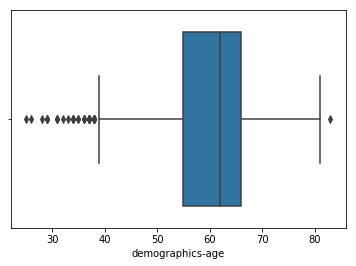

In [173]:
import seaborn as sns
p1 = sns.boxplot(x ='demographics-age', data = filled)

Age being a major factor in the way a person's body behaves, I decided to see if there are any very young or very old patients that can decrease the model's accuracy.

It can be seen from the boxplot that patients with extremely high age and extremely low age are shown as anomalies, but as it seems a pretty continuous graph I am not removing them from the data.

# 4) Label Encoding

Now, we need to convert all the object and float features into integer which can be done by encoding.

In [174]:
rest['demographics-gender'] = rest['demographics-gender'].astype(str).str.lower()   #convert everything into lower case
rest['demographics-race'] = rest['demographics-race'].astype(str).str.lower()
rest['status-smoking_status'] = rest['status-smoking_status'].astype(str).str.lower()
rest['institution'] = rest['institution'].astype(str).str.lower()
rest

,institution,demographics-age,demographics-gender,demographics-race,status-cohort_qualifier,status-disease_sub_type,status-months_since_diagnosis,status-smoking_status
0,university hospital system,46.0,male,asian,True,A,20.0,former
1,montague hospital,52.0,male,black or african american,True,A,0.0,never
2,"biolab, inc.",55.0,female,white,True,B,0.0,never
3,university hospital system,69.0,male,white,True,A,9.0,never
4,university hospital system,52.0,male,asian,True,A,10.0,former
5,"biolab, inc.",61.0,female,white,True,B,0.0,never
6,"biolab, inc.",56.0,male,black or african american,True,A,0.0,current
7,johnson & bloom hospitals,69.0,male,white,True,C,17.0,never
8,university hospital system,66.0,male,black or african american,True,A,5.0,never
9,goodfellow research institute,64.0,female,white,True,A,0.0,never


In [175]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
rest['demographics-gender']= label_encoder.fit_transform(rest['demographics-gender'])
rest['status-cohort_qualifier']= label_encoder.fit_transform(rest['status-cohort_qualifier'])
rest

,institution,demographics-age,demographics-gender,demographics-race,status-cohort_qualifier,status-disease_sub_type,status-months_since_diagnosis,status-smoking_status
0,university hospital system,46.0,1,asian,0,A,20.0,former
1,montague hospital,52.0,1,black or african american,0,A,0.0,never
2,"biolab, inc.",55.0,0,white,0,B,0.0,never
3,university hospital system,69.0,1,white,0,A,9.0,never
4,university hospital system,52.0,1,asian,0,A,10.0,former
5,"biolab, inc.",61.0,0,white,0,B,0.0,never
6,"biolab, inc.",56.0,1,black or african american,0,A,0.0,current
7,johnson & bloom hospitals,69.0,1,white,0,C,17.0,never
8,university hospital system,66.0,1,black or african american,0,A,5.0,never
9,goodfellow research institute,64.0,0,white,0,A,0.0,never


The label encoder converts variables with two categories into 0 or 1. But for features having more than two categories, one-hot encoding is used because we need binary features.

In [177]:
rest_onehot = pd.get_dummies(rest)
rest_onehot

,demographics-age,demographics-gender,status-cohort_qualifier,status-months_since_diagnosis,"institution_biolab, inc.",institution_goodfellow research institute,institution_johnson & bloom hospitals,institution_montague hospital,institution_saint penelope medical center,institution_university hospital system,...,status-disease_sub_type_A,status-disease_sub_type_B,status-disease_sub_type_C,status-disease_sub_type_D,status-disease_sub_type_E,status-disease_sub_type_F,status-smoking_status_current,status-smoking_status_former,status-smoking_status_never,status-smoking_status_unknown
0,46.0,1,0,20.0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,52.0,1,0,0.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,55.0,0,0,0.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,69.0,1,0,9.0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,52.0,1,0,10.0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
5,61.0,0,0,0.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
6,56.0,1,0,0.0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
7,69.0,1,0,17.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8,66.0,1,0,5.0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
9,64.0,0,0,0.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [178]:
encoded = pd.concat([inte,rest_onehot], axis=1)
encoded

,BM00000,BM00001,BM00002,BM00003,BM00004,BM00005,BM00006,BM00007,BM00008,BM00009,...,status-disease_sub_type_A,status-disease_sub_type_B,status-disease_sub_type_C,status-disease_sub_type_D,status-disease_sub_type_E,status-disease_sub_type_F,status-smoking_status_current,status-smoking_status_former,status-smoking_status_never,status-smoking_status_unknown
0,1,1,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,1,1,1,1,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
3,1,1,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,1,1,1,1,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
5,1,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
6,1,1,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
7,1,1,0,0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
8,1,1,1,0,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,1,0
9,0,1,0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


# 5) L1 Regularization using Lasso regressor

The entire data is normalized to get the features in the same range.

In [180]:
mean_age = encoded['demographics-age'].mean()
std_age = encoded['demographics-age'].std()
encoded['demographics-age'] = (encoded['demographics-age'] - mean_age)/std_age
mean_status = encoded['status-months_since_diagnosis'].mean()
std_status = encoded['status-months_since_diagnosis'].std()
encoded['status-months_since_diagnosis'] = (encoded['status-months_since_diagnosis'] - mean_status)/std_status

PCA is a data reduction technique which reduces many features into many PCA. On the other hand Ridge regression performs feature selection and regularization. It adds L2 regularization penalty which equals to the square of magintude of coefficients. So in the final model number of features will be reduced producing a sparse model, which is best for an imbalanced dataset like this one. Ridge is also comparatively easier to interpret than PCA. Instead of Ridge, Lasso can also be done, where it reduces the feature coefficients to zero.

In [198]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded, targets, test_size = 0.3)

In [200]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [201]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

Feature selection is done using L2 regularization using Ridge regression and the selected features are given by sel_.

In [202]:
sel_.get_support()

array([False, False, False, ...,  True,  True, False])

In [203]:
selected_feat = X_train.columns[(sel_.get_support())]

In [204]:
np.sum(sel_.estimator_.coef_ == 0)              #number of feature's coefficient removed

377

In [205]:
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))
X_train_selected.shape, X_test_selected.shape    #number of features which are important and are used for classification

((1213, 6480), (521, 6480))

A new dataset is produced with reduced number of features.

# 6) Random Forest Classification

I have decided to use Random Forest Calssifier as it works wonders on imbalanced data. The number of trees, i.e., n_estimators is kept small (10) to avoid over-fitting.

In [206]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=10).fit(X_train_selected, y_train)    #using the selected features only
rfc_pred= rfc.predict(X_test_selected)

Accuracy is an inappropriate measure for imbalanced classification problems, as there is bias towards the example from the majority class. Thus, we calculate measures like precision, recall and F1 score.

In [207]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, rfc_pred, average='binary')
precision

0.375

In [208]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, rfc_pred, average='binary')
recall

0.05405405405405406

In [209]:
from sklearn.metrics import f1_score
score = f1_score(y_test, rfc_pred, average='binary')
score

0.09448818897637795

# 7) SMOTE for over-sampling

It is seen that the precision and recall scores are pretty low. To improve this condition caused due to imbalanced data, we will use SMOTE which synthetically produces more elements from the minority class, based on those that already exists. This is called over-sampling of minority class.

In [210]:
!pip install imblearn

In [211]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 10)
X_sm, y_sm = smote.fit_sample(X_train_selected, y_train)

Now based on the data produced using SMOTE I will train the classifier again and find the metrics.

In [212]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=10).fit(X_sm, y_sm)    #using the selected features only
rfc_pred= rfc.predict(X_test_selected)

In [213]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, rfc_pred, average='binary')
precision

0.5

In [214]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, rfc_pred, average='binary')
recall

0.07207207207207207

In [215]:
from sklearn.metrics import f1_score
score = f1_score(y_test, rfc_pred, average='binary')
score

0.12598425196850394

As it can be seen that the values of the metrics change everytime the code is run. But the F1 score calculated without SMOTE is comparatively lesser than the one calculated with the SMOTE produced data.